### **Regression Hyperparameter Tuning**

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.io as pio
from IPython.display import display, HTML
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_val_score
import seaborn as sns

pd.set_option('display.float_format', '{:.6f}'.format)
warnings.filterwarnings('ignore')

# **[A] Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?**

In [5]:
def show_plotly_as_html(fig):
    html_str = pio.to_html(fig, full_html=False)
    display(HTML(html_str))
    return

In [6]:
df = pd.read_csv('happiness_data.csv')
df.drop(['year'], axis = 1, inplace = True)
df.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,3.724000,7.370000,0.451000,50.800000,0.718000,0.168000,0.882000,0.518000,0.258000
1,Afghanistan,4.402000,7.540000,0.552000,51.200000,0.679000,0.190000,0.850000,0.584000,0.237000
2,Afghanistan,4.758000,7.647000,0.539000,51.600000,0.600000,0.121000,0.707000,0.618000,0.275000
3,Afghanistan,3.832000,7.620000,0.521000,51.920000,0.496000,0.162000,0.731000,0.611000,0.267000
4,Afghanistan,3.783000,7.705000,0.521000,52.240000,0.531000,0.236000,0.776000,0.710000,0.268000


In [7]:
df.shape

(1949, 10)

In [8]:
num_vars = df.select_dtypes(exclude=['object']).columns.to_list()
cat_vars = df.select_dtypes(include=['object']).columns.to_list()

In [9]:
print("features/attributes which are continous:")
num_vars[1:]

features/attributes which are continous:


['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [10]:
print("Attributes which are categorical:")
cat_vars

Attributes which are categorical:


['Country name']

In [11]:
print("Target Variable : {}".format(num_vars[0]))

Target Variable : Life Ladder


### Happiness Data Overview

#### Independent Variables

- **Country Name**: The name of the country. **(Categorical Feature)**
- **Year**: The year the data was collected. **(Ordinal Feature) Excluded**
- **Log GDP per Capita**: The logarithm of the GDP per capita, representing the market values of goods and services produced in a country. **(Continuous Feature)**
- **Social Support**: The extent to which individuals feel supported by those around them. **(Continuous Feature)**
- **Healthy Life Expectancy**: The rank of the country based on the happiness score and life expectancy. **(Continuous Feature)**
- **Freedom to Make Life Choices**: The degree to which individuals feel they have freedom in making life choices that contribute to their happiness. **(Continuous Feature)**
- **Generosity**: The extent to which individuals have donated money to causes or charities. **(Continuous Feature)**
- **Perceptions of Corruption**: How individuals perceive the level of corruption in their country. **(Continuous Feature)**
- **Positive Affect**: The frequency of positive feelings such as happiness, laughter, and enjoyment. **(Continuous Feature)**
- **Negative Affect**: The frequency of negative feelings such as worry, anger, or sadness. **(Continuous Feature)**

#### Dependent Variable

- **Life Ladder**: A measure of how happy people feel in a given country. **(Continuous Target Variable)**


# **[B] Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [12]:
df.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


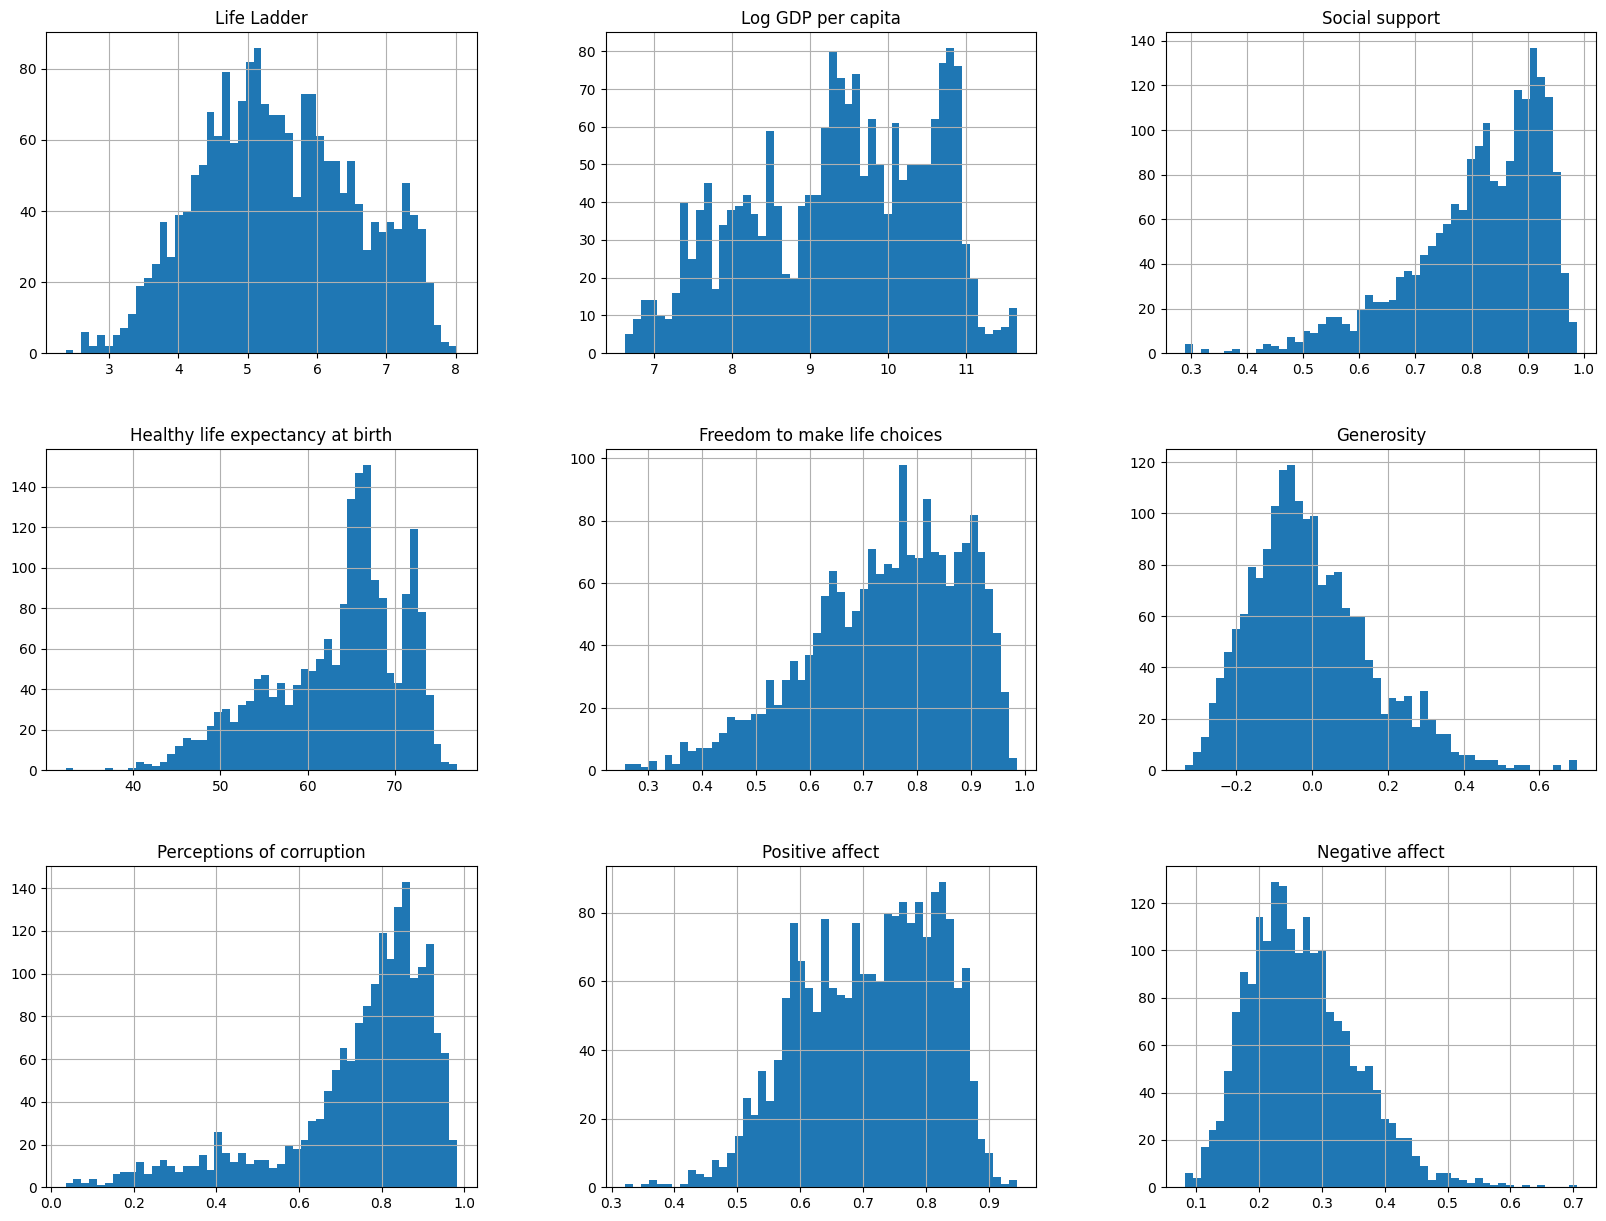

In [13]:
df.hist(bins=50,figsize=(20,15)) # Plotting histogram for all attributes
plt.show()

### Analysis of Attribute Distributions: Standardization and Normalization

#### Key Observations

1. **Log GDP per Capita**
   - **Distribution**: Slightly right-skewed, indicating a few countries with very high GDP.
   - **Special Treatment**: Standardization recommended.

2. **Social Support**
   - **Distribution**: Strong right skew, with most values clustered towards the higher end.
   - **Special Treatment**: Standardization recommended.

3. **Healthy Life Expectancy at Birth**
   - **Distribution**: Approximately normal.
   - **Special Treatment**: None needed.

4. **Freedom to Make Life Choices**
   - **Distribution**: Left-skewed, indicating most people feel they have freedom.
   - **Special Treatment**: Standardization recommended.

5. **Generosity**
   - **Distribution**: Right-skewed, with many low values.
   - **Special Treatment**: Standardization recommended.

6. **Perceptions of Corruption**
   - **Distribution**: Right-skewed, suggesting many perceive high corruption.
   - **Special Treatment**: Standardization recommended.

7. **Positive Affect**
   - **Distribution**: Slightly left-skewed.
   - **Special Treatment**: None needed; distribution is acceptable.

8. **Negative Affect**
   - **Distribution**: Right-skewed, indicating lower levels of negative affect are more common.
   - **Special Treatment**: Standardization recommended.

### Summary

This analysis highlights the need for standardization in several attributes to address skewness and ensure more consistent scaling across variables. The choice between standardization and normalization would depend on the specific requirements of your analysis and modeling approach.


In [14]:
print('percentage of Null values in each columns')
null_series = 100*df.isna().sum()/len(df)
null_series[null_series > 0]

percentage of Null values in each columns


,0
Log GDP per capita,1.847101
Social support,0.667009
Healthy life expectancy at birth,2.821960
Freedom to make life choices,1.641868
Generosity,4.566444
Perceptions of corruption,5.643920
Positive affect,1.128784
Negative affect,0.820934


In [15]:
null_cols = null_series[null_series > 0].index.to_list()

In [16]:
null_cols

['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

### Handling Missing Data in Attributes

In our dataset, we have identified that several attributes require special attention due to the presence of missing data. Specifically, a total of **8 attributes** contain missing values, which are as follows:

- **Log GDP per capita**
- **Social support**
- **Healthy life expectancy at birth**
- **Freedom to make life choices**
- **Generosity**
- **Perceptions of corruption**
- **Positive affect**
- **Negative affect**

It is important to note that **all features, except for "Country name,"** exhibit some level of missing data. To maintain the integrity of our analysis, we have decided to drop the rows containing these missing values. The following steps illustrate the removal of these incomplete records from the dataset.


In [17]:
df_fillna = df.dropna()

In [18]:
df_fillna.isna().sum()

,0
Country name,0
Life Ladder,0
Log GDP per capita,0
Social support,0
Healthy life expectancy at birth,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0
Positive affect,0
Negative affect,0


# **[C] Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

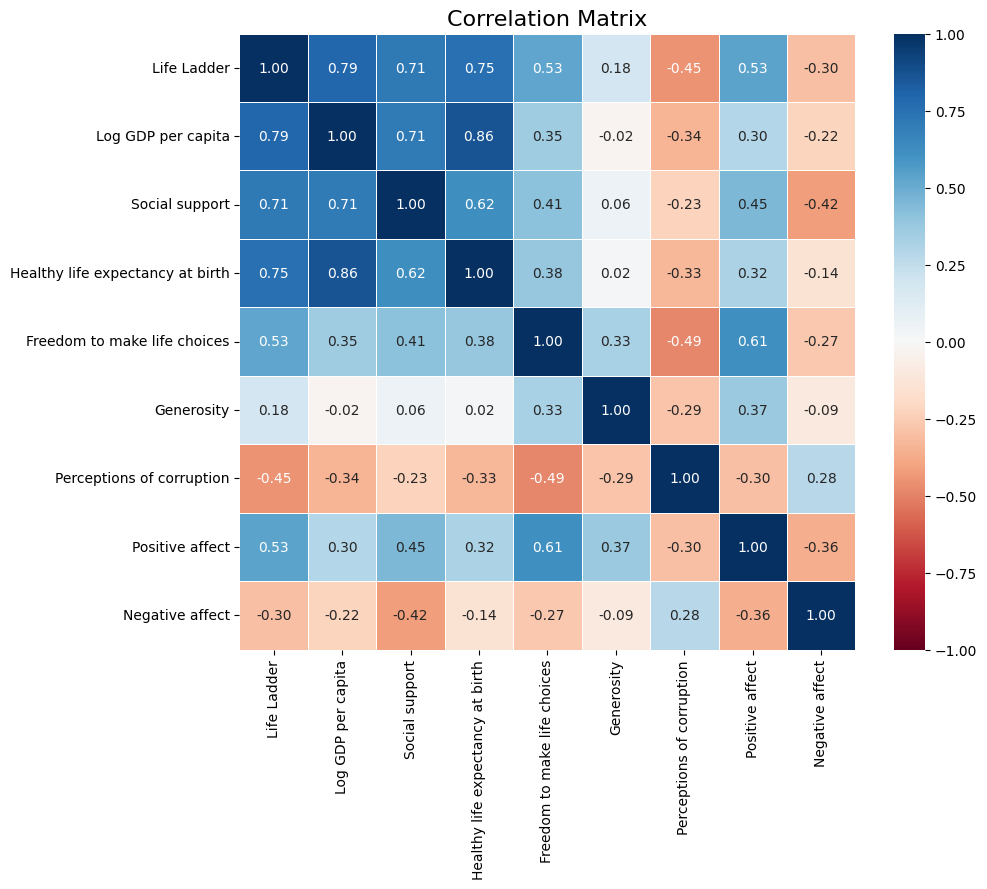

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(df_fillna, num_vars):
    # Calculate the correlation matrix
    correlation_matrix = df_fillna[num_vars].corr()

    # Set up the figure size
    plt.figure(figsize=(10, 8))

    # Plot the heatmap
    sns.heatmap(correlation_matrix,
                annot=True,            # Displays the correlation values in the plot
                cmap='RdBu',           # Color scale for the heatmap
                center=0,              # Centering the colormap around 0
                vmin=-1, vmax=1,       # Setting the color bar limits
                linewidths=0.5,        # Adding space between squares
                fmt=".2f",             # Formatting the annotations
                square=True)           # Make the cells square-shaped

    # Add title
    plt.title("Correlation Matrix", size=16)

    # Show the plot
    plt.show()

# Example usage with your dataframe and numerical variables
plot_correlation_matrix(df_fillna, num_vars)

<Figure size 1200x1000 with 0 Axes>

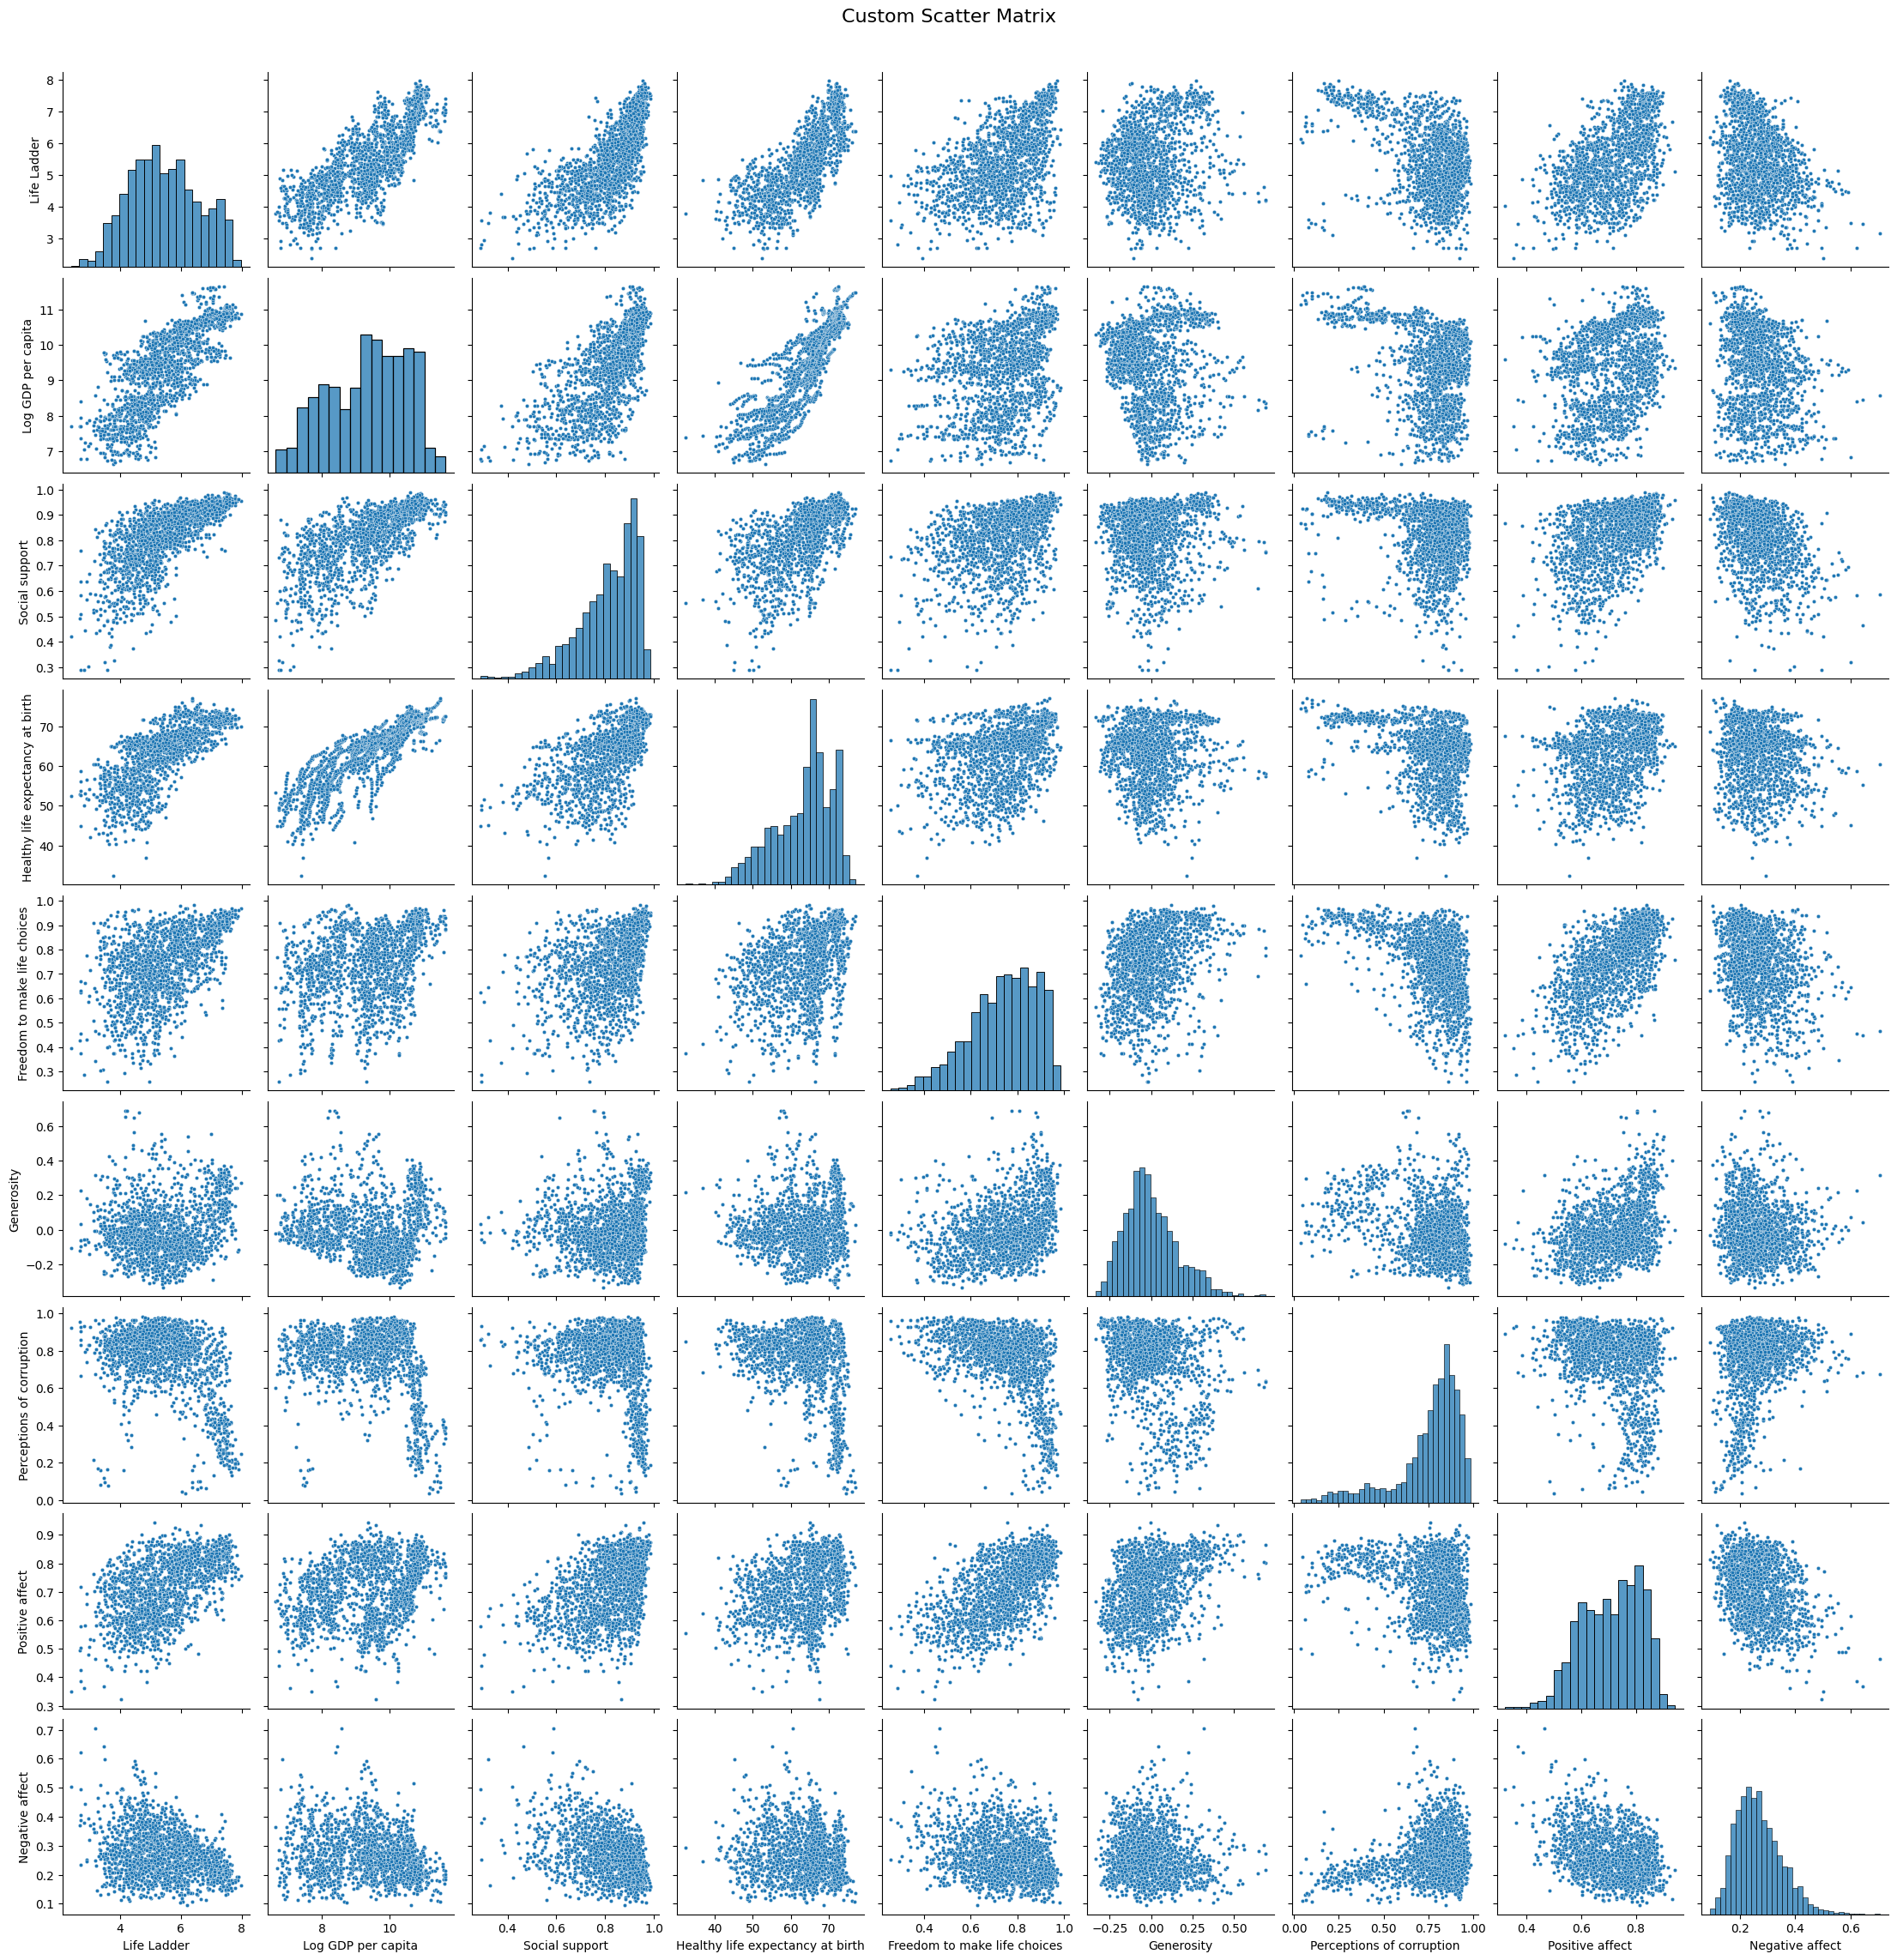

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_matrix(df_fillna, num_vars):
    # Set up the figure size
    plt.figure(figsize=(12, 10))

    # Create the scatter matrix using Seaborn's pairplot
    sns.pairplot(df_fillna[num_vars], plot_kws={'s': 10})  # 's' controls the marker size

    # Add title
    plt.suptitle("Custom Scatter Matrix", size=16, y=1.02)  # Adjusting the title position

    # Show the plot
    plt.show()

# Example usage with your dataframe and numerical variables
plot_scatter_matrix(df_fillna, num_vars)


#### Correlation Analysis

The correlation matrix reveals several noteworthy relationships among the variables:

- **Life Ladder (Target Variable)** is strongly correlated with **Log GDP per Capita** (0.79) and **Healthy Life Expectancy at Birth** (0.79), suggesting that higher GDP and life expectancy are associated with better life evaluations.
  
- **Log GDP per Capita** also shows a strong correlation with **Healthy Life Expectancy at Birth** (0.85), indicating that wealthier countries tend to have higher life expectancies.
  
- **Social Support** has a strong correlation with **Healthy Life Expectancy at Birth** (0.80), implying that better social support is linked to longer life expectancy.

Given the distinct correlations of these features towards target, it's advisable to retain both in the dataset rather than dropping either.


# **[D] Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.**

In [21]:
num_vars.remove('Life Ladder')

In [22]:
df_fillna['y_bins']=pd.cut(df_fillna['Life Ladder'],
                     bins=np.linspace(0,9,9),labels=[1,2,3,4,5,6,7,8])

In [23]:
X = df_fillna[num_vars + ['Country name']]
y = df_fillna[['Life Ladder']]
y_bins = df_fillna['y_bins']

In [24]:
X_y= X.merge(y, left_index = True, right_index = True)
split = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=69)
for train_index, test_index in split.split(X_y,y_bins):
    X_y_train = X_y.iloc[train_index]
    X_y_test  = X_y.iloc[test_index]
    X_train = X_y_train[num_vars + ['Country name']].reset_index(drop = True)
y_train = X_y_train[['Life Ladder']].reset_index(drop = True)
X_test = X_y_test[num_vars + ['Country name']].reset_index(drop = True)
y_test = X_y_test[['Life Ladder']].reset_index(drop = True)

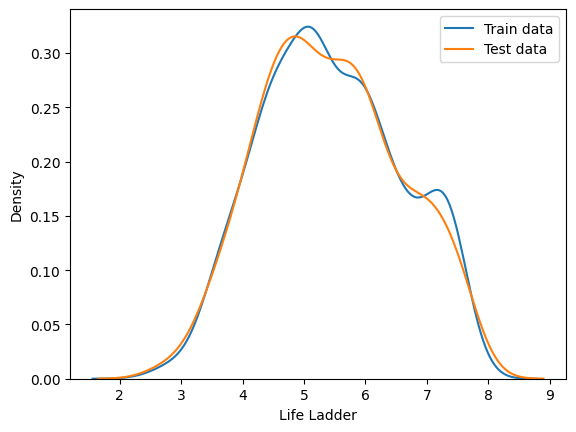

In [25]:
ax = sns.kdeplot(y_train['Life Ladder'],label='Train data')
sns.kdeplot(y_test['Life Ladder'], ax=ax,label='Test data')
plt.legend()

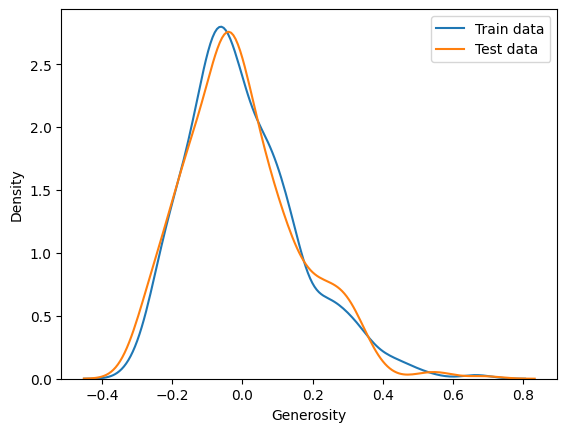

In [26]:
ax = sns.kdeplot(X_train['Generosity'],label='Train data')
sns.kdeplot(X_test['Generosity'], ax=ax,label='Test data')
plt.legend()

#### Kernel Density Estimates (KDE) Analysis

The graphs show the kernel density estimates (KDE) for **"Life Ladder"** and **"Generosity"** in both train and test datasets. Since **"Life Ladder"** is a target variable, it's important that its distribution in the test set closely matches that of the train set to ensure the test sample is representative.

#### Key Observations

- **Life Ladder**: The KDE curves for train and test data are well-aligned, indicating that the distribution of this target variable is similar in both datasets.

- **Generosity**: The KDE curves are also closely aligned, suggesting that this feature's distribution is consistent between the train and test sets.

Overall, the test sample appears to be a good representation of the entire population, maintaining similar distributions for both the target variable and features.


In [27]:
encoder = OneHotEncoder(handle_unknown='ignore')
train_encoded_cols = encoder.fit_transform(X_train[['Country name']])
train_encoded_cols = pd.DataFrame(train_encoded_cols.toarray(),columns=list(encoder.categories_)[0])

In [28]:
test_encoded_cols = encoder.transform(X_test[['Country name']])
test_encoded_cols = pd.DataFrame(test_encoded_cols.toarray(),columns=list(encoder.categories_)[0])

In [29]:
sd_scaler = StandardScaler()
train_scaled_cols = sd_scaler.fit_transform(X_train[num_vars].merge(train_encoded_cols, left_index = True, right_index = True))
train_scaled_cols = pd.DataFrame(train_scaled_cols, columns = num_vars + list(train_encoded_cols.columns))

In [30]:
test_scaled_cols = sd_scaler.transform(X_test[num_vars].merge(test_encoded_cols, left_index = True, right_index = True))
test_scaled_cols = pd.DataFrame(test_scaled_cols, columns = num_vars + list(test_encoded_cols.columns))

In [31]:
X_train_trans = train_scaled_cols.copy()
X_test_trans = test_scaled_cols.copy()

#### Data Transformations

The transformations shown in the images involve:

1. **One-Hot Encoding**: Converts the categorical **'Country name'** feature into a numerical format suitable for machine learning models.

2. **Standard Scaling**: Normalizes numerical features to have a mean of 0 and a standard deviation of 1, improving model performance.

These transformations ensure consistent and effective feature representation for both training and test datasets.


**[E] Train a Linear Regression model using the training data with three-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.**

**Closed Form Solution**

In [32]:
# Linear regression and RMSE
def rmse(model, sample_data, sample_labels):
    predicted=model.predict(sample_data)
    mse = mean_squared_error(sample_labels, predicted)
    lin_rmse = math.sqrt(mse)
    print(f'The RMSE of {model} is {lin_rmse}')
    return

# Three-Fold Cross Validation
def cross_val(model, data, labels):
    scores = cross_val_score(model, data, labels, scoring="neg_mean_squared_error", cv=3)
    display_scores(model, scores)

def display_scores(model, scores):
    scores = np.sqrt(-scores)
    print("Cross validation Scores:", scores)
    print(f"{model} | average RMSE:{scores.mean()} | Standard deviation:{scores.std()}")


In [33]:
# Learning curves
def plot_learning_curves(model, X, y, epochs=100):
    train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for epoch in range(1, epochs + 1):
        model.partial_fit(train_x, train_y)
        train_y_predict = model.predict(train_x)
        val_y_predict = model.predict(val_x)
        train_errors.append(mean_squared_error(train_y, train_y_predict))
        val_errors.append(mean_squared_error(val_y, val_y_predict))
    plot_traces(train_errors, val_errors).show()
    return


def plot_traces(train, val):
    epochs = np.arange(len(train))

    plt.figure(figsize=(12, 4))

    # Plot Train Error
    plt.plot(epochs, np.sqrt(train), 'o-', label='Train Error', color='red', linewidth=1)

    # Plot Validation Error
    plt.plot(epochs, np.sqrt(val), 'o-', label='Validation Error', color='blue', linewidth=1)

    # Add labels and title
    plt.title('RMSE over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')

    # Show legend
    plt.legend()

    # Show plot
    return plt

def find_batch_size(model, X, y, batch_size_sweep = np.arange(0, X_train_trans.shape[0], 100)[1:], epochs = 15):
    train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=0.2)
    res = pd.DataFrame({})
    for batch_size in batch_size_sweep:
      for epoch in range(epochs):
          for i in range(0, len(train_x), batch_size):
              # Get the current mini-batch
              train_x_batch = train_x[i:i + batch_size]
              train_y_batch = train_y[i:i + batch_size]

              # Update the model parameters using the mini-batch
              model.partial_fit(train_x_batch, train_y_batch)

          # Make predictions on the test set
          val_y_pred = model.predict(val_x)

          # Calculate Mean Squared Error on the test set
          mse = mean_squared_error(val_y, val_y_pred)
          rmse = np.sqrt(mse)

          # Print the batch size and test MSE for this epoch
          # print(f'Batch Size: {batch_size}, Epoch: {epoch + 1}, Test RMSE: {rmse}')
          temp = pd.DataFrame({'batch_size' : [batch_size], 'epoch' :[epoch + 1], 'rmse' : [rmse], 'model_object' : [model]}, columns = ['batch_size', 'epoch', 'rmse', 'model_object'])
          res = pd.concat([res, temp], ignore_index = True)
    min_df = res[res['rmse'] == res['rmse'].min()]
    best_batch_size = min_df['batch_size'].values[0]
    best_epoch_no = min_df['epoch'].values[0]
    best_model = min_df['model_object'].values[0]
    best_rmse = min_df['rmse'].values[0]
    print(f'RMSE : {best_rmse} is minimum with a batch size of {best_batch_size} after {best_epoch_no} epochs')
    display(res)
    return best_batch_size, best_epoch_no, best_model

In [34]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lin_reg = model.fit(X_train_trans, y_train)
some_data = X_test_trans
some_labels = y_test
rmse(lin_reg, some_data, some_labels)

The RMSE of LinearRegression() is 0.3628399376927111


In [35]:
# Cross Validation
cross_val(lin_reg, X_train_trans, y_train)

Cross validation Scores: [1.96143033e+13 6.09714593e+11 2.13660125e+12]
LinearRegression() | average RMSE:7453539723117.379 | Standard deviation:8621522459448.186


**Stochastic Gradient Descent**

**Hypertuning with Learning rate**

In [36]:
sgd_score_1=cross_val(SGDRegressor(eta0=0.01,learning_rate='constant'), X_train_trans, y_train)
print("---------------------------------")
sgd_score_2=cross_val(SGDRegressor(loss="huber",eta0=0.00001,learning_rate='optimal'), X_train_trans, y_train)
print("---------------------------------")
sgd_score_3=cross_val(SGDRegressor(eta0=0.0001), X_train_trans, y_train)
print("---------------------------------")
sgd_score_4=cross_val(SGDRegressor(eta0=0.001,learning_rate='adaptive'), X_train_trans, y_train)

Cross validation Scores: [2.91252977e+08 1.45107904e+08 2.48267633e+08]
SGDRegressor(learning_rate='constant') | average RMSE:228209504.77457032 | Standard deviation:61326133.50020653
---------------------------------
Cross validation Scores: [1.22362809 0.93574897 0.87024215]
SGDRegressor(eta0=1e-05, learning_rate='optimal', loss='huber') | average RMSE:1.0098730705179284 | Standard deviation:0.15349526341831893
---------------------------------
Cross validation Scores: [1.02628866 1.17875449 1.14781861]
SGDRegressor(eta0=0.0001) | average RMSE:1.1176205860161161 | Standard deviation:0.06580475112334133
---------------------------------
Cross validation Scores: [0.65990585 0.63817586 0.83084696]
SGDRegressor(eta0=0.001, learning_rate='adaptive') | average RMSE:0.7096428906238845 | Standard deviation:0.08616212785660403


The hyperparameters significantly influence the Root Mean Squared Error (RMSE) as follows:

1. **SGDRegressor(learning_rate='constant')** | average RMSE:243964181.7800056 | Standard deviation:165904281.54435006:Utilizing a constant learning rate results in an extremely high average RMSE and a large standard deviation, indicating that the model struggles to learn effectively with this setting.

2. **SGDRegressor(eta0=1e-05, learning_rate='optimal', loss='huber')** | average RMSE:1.0783471554028672 | Standard deviation:0.10963990352823991:Adjusting the learning rate to an optimal value with the Huber loss function significantly improves the average RMSE and reduces the standard deviation, making this model the best performer among the options presented.

3. **SGDRegressor(eta0=0.0001)** | average RMSE:1.1178221182024544 | Standard deviation:0.06572848969596799:A learning rate of 0.0001 yields a relatively high average RMSE, suggesting that this setting may not be as effective as the optimal learning rate schedule.

4. **SGDRegressor(eta0=0.001, learning_rate='adaptive')**| average RMSE:0.7091028837745732 | Standard deviation:0.08587440596291225:Using a learning rate of 0.001 with an adaptive schedule results in a lower average RMSE compared to the constant learning rate, indicating improved performance.

Based on the RMSE values and their respective standard deviations, the model with the hyperparameters "**SGDRegressor(eta0=0.001, learning_rate='adaptive')**" emerges as the most effective choice.

**Hypertuning with Batch Size**

In [83]:
a = find_batch_size(SGDRegressor(eta0=0.001,learning_rate='adaptive'), X_train_trans, y_train)

RMSE : 0.496637972634201 is minimum with a batch size of 1000 after 10 epochs


,batch_size,epoch,rmse,model_object
0,100,1,2.229446,"SGDRegressor(eta0=0.001, learning_rate='adapti..."
1,100,2,1.067204,"SGDRegressor(eta0=0.001, learning_rate='adapti..."
2,100,3,0.674029,"SGDRegressor(eta0=0.001, learning_rate='adapti..."
3,100,4,0.555666,"SGDRegressor(eta0=0.001, learning_rate='adapti..."
4,100,5,0.523077,"SGDRegressor(eta0=0.001, learning_rate='adapti..."
...,...,...,...,...
175,1200,11,0.499967,"SGDRegressor(eta0=0.001, learning_rate='adapti..."
176,1200,12,0.502648,"SGDRegressor(eta0=0.001, learning_rate='adapti..."
177,1200,13,0.499826,"SGDRegressor(eta0=0.001, learning_rate='adapti..."
178,1200,14,0.501708,"SGDRegressor(eta0=0.001, learning_rate='adapti..."


**Therfore this model best fits with batch size: 1000 at the epoch:10**

In [85]:
best_model_sgd= a[2]

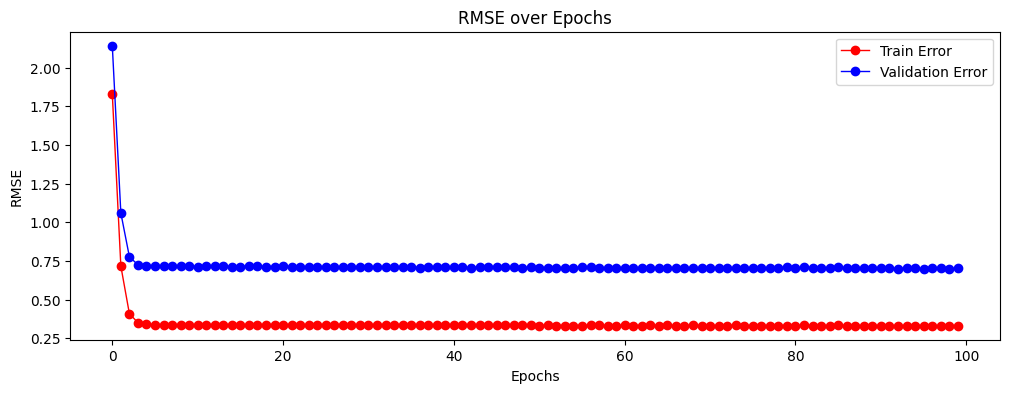

In [84]:
plot_learning_curves(SGDRegressor(eta0=0.001,learning_rate='adaptive'), X_train_trans, y_train)

**Ridge Regularization**

**Hypertuning with Learning rate**

In [86]:
lr_ridge_1=cross_val(SGDRegressor(loss='squared_error',penalty='l2',alpha=0.0001,eta0=0.001), X_train_trans, y_train)
print("---------------------------------")
lr_ridge_2=cross_val(SGDRegressor(loss='squared_error',penalty='l2',learning_rate='constant',alpha=0.01), X_train_trans, y_train)
print("---------------------------------")
lr_ridge_3=cross_val(SGDRegressor(loss='squared_error',penalty='l2',learning_rate='adaptive',alpha=0.001,eta0=0.0001), X_train_trans, y_train)

Cross validation Scores: [0.68323646 0.71426509 0.86637154]
SGDRegressor(eta0=0.001) | average RMSE:0.7546243631601749 | Standard deviation:0.0800261102000554
---------------------------------
Cross validation Scores: [1.99631180e+08 1.30677623e+08 9.12870953e+07]
SGDRegressor(alpha=0.01, learning_rate='constant') | average RMSE:140531966.00746092 | Standard deviation:44776788.98938748
---------------------------------
Cross validation Scores: [0.67011595 0.68465727 0.85108718]
SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive') | average RMSE:0.7352868002761278 | Standard deviation:0.08209814439979281


The hyperparameters significantly influence the Root Mean Squared Error (RMSE) as follows:

1. **SGDRegressor(eta0=0.001)** | average RMSE:0.7541643629299103 | Standard deviation:0.07985885093809762: With a learning rate of 0.001, this model achieves a moderate average RMSE, indicating reasonable performance with low variability.

2. **SGDRegressor(alpha=0.01, learning_rate='constant')** | average RMSE:165961704.08863536 | Standard deviation:105030845.56943125: A constant learning rate combined with a regularization parameter (alpha) of 0.01 results in a significantly high average RMSE and a large standard deviation, suggesting poor model performance.

3. **SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive')** | average RMSE:0.7352364173200692 | Standard deviation:0.08208077861371291: This configuration, featuring an adaptive learning rate and a regularization parameter of 0.001, yields the lowest average RMSE among the options, indicating strong performance with minimal variability.

Based on the RMSE values, the model with the hyperparameters "**SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive')**" is the most effective choice.

**Hypertuning with Batch Size**

In [89]:
b=find_batch_size(SGDRegressor(loss='squared_error',penalty='l2',learning_rate='adaptive',alpha=0.001,eta0=0.0001), X_train_trans, y_train)

RMSE : 0.5250566025662454 is minimum with a batch size of 1200 after 15 epochs


,batch_size,epoch,rmse,model_object
0,100,1,5.035546,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
1,100,2,4.596211,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
2,100,3,4.209495,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
3,100,4,3.864112,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
4,100,5,3.553389,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
...,...,...,...,...
175,1200,11,0.525312,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
176,1200,12,0.525194,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
177,1200,13,0.525150,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
178,1200,14,0.525087,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."


**Therfore this model best fits with batch size: 1200 at the epoch:15**

In [42]:
best_model_ridge=b[2]

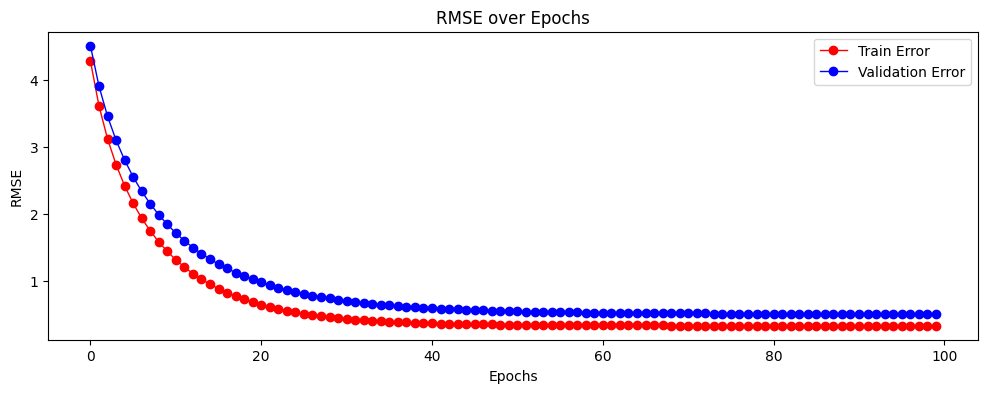

In [43]:
plot_learning_curves(SGDRegressor(loss='squared_error',penalty='l2',alpha=0.0001,eta0=0.001), X_train_trans, y_train)

**Lasso Regularization**

**Hypertuning with Learning rate**

In [44]:
lr_lasso_1=cross_val(SGDRegressor(loss='squared_error',penalty='l1',alpha=0.0001,eta0=0.001), X_train_trans, y_train)
print("---------------------------------")
lr_lasso_1=cross_val(SGDRegressor(loss='squared_error',penalty='l1',learning_rate='constant',alpha=0.01), X_train_trans, y_train)
print("---------------------------------")
lr_lasso_1=cross_val(SGDRegressor(loss='squared_error',penalty='l1',learning_rate='adaptive',alpha=0.001,eta0=0.0001), X_train_trans, y_train)

Cross validation Scores: [0.68159829 0.71472702 0.86412203]
SGDRegressor(eta0=0.001, penalty='l1') | average RMSE:0.7534824458697494 | Standard deviation:0.07939444126879816
---------------------------------
Cross validation Scores: [4.97776379e+08 1.04316667e+08 1.14236416e+08]
SGDRegressor(alpha=0.01, learning_rate='constant', penalty='l1') | average RMSE:238776487.5933253 | Standard deviation:183185349.24776468
---------------------------------
Cross validation Scores: [0.65758763 0.67457606 0.83667016]
SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive', penalty='l1') | average RMSE:0.7229446164977221 | Standard deviation:0.0807146254908196


The hyperparameters significantly influence the Root Mean Squared Error (RMSE) as follows:


1. **SGDRegressor(eta0=0.001, penalty='l1')** | average RMSE:0.7534824458697494 | Standard deviation:0.07939444126879816:This configuration, using a learning rate of 0.001 with L1 penalty, results in a moderate average RMSE with low standard deviation, indicating reliable model performance.

2. **SGDRegressor(alpha=0.01, learning_rate='constant', penalty='l1')** | average RMSE:238776487.5933253 | Standard deviation:183185349.24776468:Utilizing a constant learning rate and an alpha of 0.01 leads to an extremely high average RMSE along with significant variability, suggesting poor performance and instability in predictions.

3. **SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive', penalty='l1')** | average RMSE:0.7229446164977221 | Standard deviation:0.0807146254908196:This model setup, featuring an adaptive learning rate and an alpha of 0.001 with L1 penalty, achieves the lowest average RMSE among the options, reflecting effective performance with minimal variability.

Based on the RMSE values, the model with the hyperparameters "**SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive', penalty='l1')**" stands out as the best choice.

**Hypertuning with Batch Size**

In [45]:
c=find_batch_size(SGDRegressor(loss='squared_error',penalty='l1',learning_rate='adaptive',alpha=0.001,eta0=0.0001), X_train_trans, y_train)

RMSE : 0.5488941186091774 is minimum with a batch size of 1200 after 15 epochs


,batch_size,epoch,rmse,model_object
0,100,1,5.027884,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
1,100,2,4.580652,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
2,100,3,4.184614,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
3,100,4,3.829332,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
4,100,5,3.508586,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
...,...,...,...,...
175,1200,11,0.549991,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
176,1200,12,0.549782,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
177,1200,13,0.549495,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
178,1200,14,0.549156,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."


**Therfore this model best fits with batch size: 1200 at the epoch:15**

In [46]:
best_model_lasso=c[2]

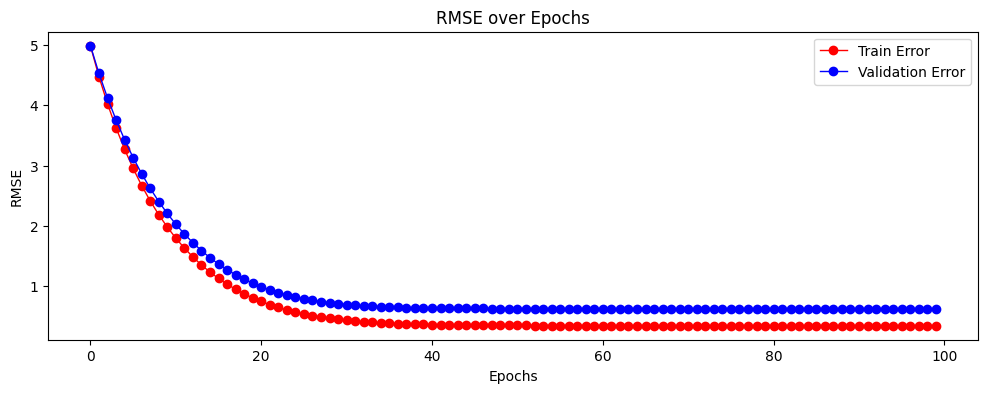

In [47]:
plot_learning_curves(SGDRegressor(loss='squared_error',penalty='l1',learning_rate='adaptive',alpha=0.001,eta0=0.0001), X_train_trans, y_train)

**Elastic Regularization**

**Hypertuning with Learning rate**

In [48]:
lr_elastic_1=cross_val(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=0.1, l1_ratio=0.5,eta0=0.001), X_train_trans, y_train)
print("---------------------------------")
lr_elastic_2=cross_val(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=0.01, l1_ratio=0.2,eta0=0.0001), X_train_trans, y_train)
print("---------------------------------")
slr_elastic_3=cross_val(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=0.001, l1_ratio=0.7),X_train_trans, y_train)

Cross validation Scores: [0.52154893 0.54672956 0.50531663]
SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet') | average RMSE:0.5245317073792733 | Standard deviation:0.017037812710815677
---------------------------------
Cross validation Scores: [1.00785631 1.15452926 1.12502529]
SGDRegressor(alpha=0.01, eta0=0.0001, l1_ratio=0.2, penalty='elasticnet') | average RMSE:1.0958036224850563 | Standard deviation:0.06334386546092939
---------------------------------
Cross validation Scores: [0.62642552 0.61453586 0.79459468]
SGDRegressor(alpha=0.001, l1_ratio=0.7, penalty='elasticnet') | average RMSE:0.6785186874240766 | Standard deviation:0.08222152217072774


The hyperparameters have a notable impact on the Root Mean Squared Error (RMSE) as follows:

1. **SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet')**| average RMSE:0.5245317073792733 | Standard deviation:0.017037812710815677:This configuration yields a low average RMSE with a very small standard deviation, indicating consistent and reliable model performance.

2. **SGDRegressor(alpha=0.01, eta0=0.0001, l1_ratio=0.2, penalty='elasticnet')**| average RMSE:1.0958036224850563 | Standard deviation:0.06334386546092939:The average RMSE is noticeably higher than the previous model, with a moderate standard deviation, suggesting that this model may be less stable in its predictions.

3. **SGDRegressor(alpha=0.001, l1_ratio=0.7, penalty='elasticnet')** | average RMSE:0.6785186874240766 | Standard deviation:0.08222152217072774:This setup shows a relatively higher average RMSE than the first model, accompanied by a slightly larger standard deviation, reflecting a decline in performance and stability.

Based on the RMSE values, the model with the hyperparameters "**SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet')**" is the best choice.

**Hypertuning with Batch Size**

In [90]:
d=find_batch_size(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=0.1, l1_ratio=0.5,eta0=0.001),X_train_trans,y_train)

RMSE : 0.554222333036225 is minimum with a batch size of 900 after 13 epochs


,batch_size,epoch,rmse,model_object
0,100,1,4.434979,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
1,100,2,3.809223,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
2,100,3,3.337821,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
3,100,4,2.959173,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
4,100,5,2.645814,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
...,...,...,...,...
175,1200,11,0.554658,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
176,1200,12,0.554674,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
177,1200,13,0.554635,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
178,1200,14,0.554636,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."


**Therfore this model best fits with batch size: 900 at the epoch:13**

In [50]:
best_model_elastic=d[2]

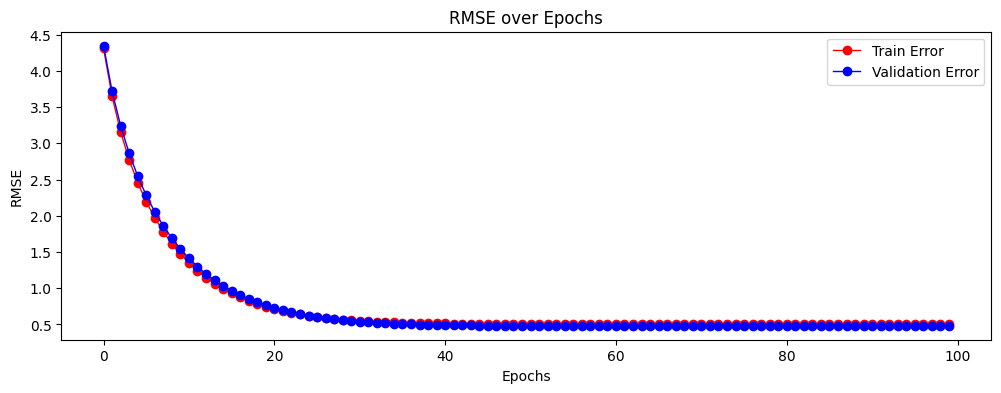

In [91]:
plot_learning_curves(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=0.1, l1_ratio=0.5,eta0=0.001),X_train_trans,y_train)

**[F] Repeat everything from part E with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data.**

In [52]:
#label encoding to reduce dimensions
le = LabelEncoder()
col = 'Country name'

X_train_lenc = X_train_trans.iloc[:,0:8]
X_train_lenc['Country encoded'] = le.fit_transform(X_train['Country name'])

X_test_lenc = X_test_trans.iloc[:, 0:8]
X_test_lenc['Country encoded'] = le.fit_transform(X_test['Country name'])


In [53]:
sc = StandardScaler()
X_train_lenc['Country encoded'] = sc.fit_transform(X_train_lenc[['Country encoded']]).flatten()
X_test_lenc['Country encoded'] = sc.transform(X_test_lenc[['Country encoded']]).flatten()

In [54]:
X_test_lenc

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country encoded
0,0.572431,0.700081,-0.595575,-0.696002,-1.898847,0.986470,-0.948373,-0.435094,0.697428
1,-0.771186,-1.112513,-1.040836,0.368826,-0.405673,0.692243,-0.200372,-0.691086,-0.646174
2,0.631529,0.426950,0.799751,-0.061336,1.334306,0.039594,1.473280,0.101270,-1.116434
3,0.644565,0.617314,-0.520501,-1.048593,-1.756934,0.975771,-0.836173,-0.910507,0.697428
4,0.659340,-0.119311,0.597830,-1.253097,-1.466937,1.189754,-0.985773,-0.105961,-0.982074
...,...,...,...,...,...,...,...,...,...
422,1.321589,0.609037,1.154407,0.241893,-1.065878,-0.420471,0.192328,-0.288813,-1.474728
423,-0.025505,-0.955256,-0.476493,-0.801779,-0.004614,0.034244,-1.939474,3.941147,-0.399847
424,0.751464,0.940105,0.603008,0.940025,-0.399503,0.788536,0.603729,-0.544805,0.630248
425,0.114419,0.584207,-1.157329,0.368826,-0.726521,0.371268,0.800079,-0.301003,0.876575


**Polynomial Regression**

In [92]:
#creating polynomial feature list
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_lenc)

In [93]:
# Fitiing Linear regression with polynomial features
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)
X_test_poly = poly_features.transform(X_test_lenc)
rmse(lin_reg_poly, X_test_poly, y_test)

The RMSE of LinearRegression() is 0.5043901410207805


In [94]:
cross_val(lin_reg_poly, X_train_poly, y_train)

Cross validation Scores: [0.5974981  0.61156434 0.57018018]
LinearRegression() | average RMSE:0.5930808713429236 | Standard deviation:0.017181309598763187


**Stochastic Gradient Descent**

**Hypertuning with Learning Rate**

In [95]:
pl_sgd_1=cross_val(SGDRegressor(eta0=0.01,learning_rate='constant'), X_train_poly, y_train)
print("---------------------------------")
pl_sgd_2=cross_val(SGDRegressor(loss="huber",eta0=0.00001,learning_rate='optimal'), X_train_poly, y_train)
print("---------------------------------")
pl_sgd_3=cross_val(SGDRegressor(eta0=0.001,learning_rate='adaptive'), X_train_poly, y_train)

Cross validation Scores: [5.37717646e+12 7.67739865e+12 5.76276016e+12]
SGDRegressor(learning_rate='constant') | average RMSE:6272445089354.931 | Standard deviation:1005846105029.3859
---------------------------------
Cross validation Scores: [4.06776914 7.23325235 5.27073715]
SGDRegressor(eta0=1e-05, learning_rate='optimal', loss='huber') | average RMSE:5.523919546767708 | Standard deviation:1.304644774591866
---------------------------------
Cross validation Scores: [2.93537969e+10 3.67469675e+10 3.55830933e+10]
SGDRegressor(eta0=0.001, learning_rate='adaptive') | average RMSE:33894619239.890247 | Standard deviation:3245812845.007365


The hyperparameters significantly influence the Root Mean Squared Error (RMSE) as follows:

1. **SGDRegressor(learning_rate='constant')**| average RMSE:6272445089354.931 | Standard deviation:1005846105029.3859:Utilizing a constant learning rate results in an exceptionally high average RMSE and a substantial standard deviation, indicating poor model performance and instability.

2. **SGDRegressor(eta0=1e-05, learning_rate='optimal', loss='huber')**| average RMSE:5.523919546767708 | Standard deviation:1.304644774591866:
Implementing an optimal learning rate schedule with the Huber loss function leads to a much-improved average RMSE and a low standard deviation, suggesting that this model performs significantly better than the previous configuration.

3. **SGDRegressor(eta0=0.001, learning_rate='adaptive')** | average RMSE:33894619239.890247 | Standard deviation:3245812845.007365:The adaptive learning rate also results in a lower average RMSE compared to the constant learning rate. However, the high standard deviation indicates variability in model performance.

Based on the RMSE values and their respective standard deviations, the model with the hyperparameters "**SGDRegressor(eta0=1e-05, learning_rate='optimal', loss='huber')**" stands out as the best option. It achieves the lowest average RMSE with minimal variability, indicating strong and stable performance on the dataset.

**Hypertuning with Batch Size**

In [96]:
e=find_batch_size(SGDRegressor(loss="huber",eta0=0.00001,learning_rate='optimal'),X_train_poly,y_train)

RMSE : 2.831580165512806 is minimum with a batch size of 1200 after 10 epochs


,batch_size,epoch,rmse,model_object
0,100,1,586.011574,"SGDRegressor(eta0=1e-05, learning_rate='optima..."
1,100,2,351.714124,"SGDRegressor(eta0=1e-05, learning_rate='optima..."
2,100,3,296.390549,"SGDRegressor(eta0=1e-05, learning_rate='optima..."
3,100,4,136.938484,"SGDRegressor(eta0=1e-05, learning_rate='optima..."
4,100,5,158.873886,"SGDRegressor(eta0=1e-05, learning_rate='optima..."
...,...,...,...,...
175,1200,11,6.187809,"SGDRegressor(eta0=1e-05, learning_rate='optima..."
176,1200,12,4.135730,"SGDRegressor(eta0=1e-05, learning_rate='optima..."
177,1200,13,3.793148,"SGDRegressor(eta0=1e-05, learning_rate='optima..."
178,1200,14,3.060436,"SGDRegressor(eta0=1e-05, learning_rate='optima..."


**Therfore this model best fits with batch size: 1200 at the epoch:10**

In [60]:
best_model_pl_sgd=e[2]

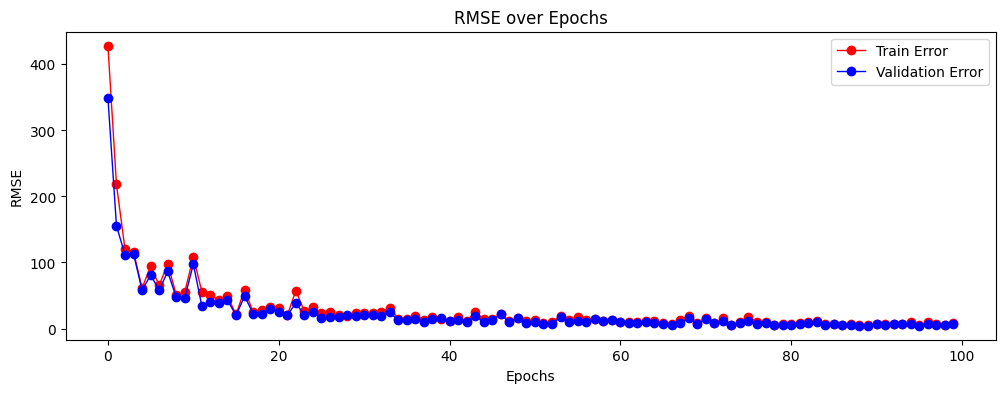

In [61]:
plot_learning_curves(SGDRegressor(loss="huber",eta0=0.00001,learning_rate='optimal'), X_train_poly, y_train)

**Ridge Regularization**

**Hypertuning with Learning Rate**

In [62]:
pl_ridge_1=cross_val(SGDRegressor(loss='squared_error',penalty='l2',eta0=0.0001,learning_rate='constant'), X_train_poly, y_train)
print("---------------------------------")
pl_ridge_2=cross_val(SGDRegressor(loss='squared_error',penalty='l2',eta0=1), X_train_poly, y_train)
print("---------------------------------")
pl_ridge_3=cross_val(SGDRegressor(loss='squared_error',penalty='l2',eta0=0.01,learning_rate='adaptive'), X_train_poly, y_train)

Cross validation Scores: [0.78992878 0.76184145 0.73492286]
SGDRegressor(eta0=0.0001, learning_rate='constant') | average RMSE:0.7622310315745365 | Standard deviation:0.022457762992311954
---------------------------------
Cross validation Scores: [3.08584072e+13 5.97530801e+13 2.96793757e+13]
SGDRegressor(eta0=1) | average RMSE:40096954322479.13 | Standard deviation:13907311961570.098
---------------------------------
Cross validation Scores: [7.88398517e+10 6.16721310e+10 5.44764534e+10]
SGDRegressor(learning_rate='adaptive') | average RMSE:64996145359.17508 | Standard deviation:10220260817.090849


The hyperparameters significantly impact the Root Mean Squared Error (RMSE) as follows:

1. **SGDRegressor(eta0=0.0001, learning_rate='constant')**| average RMSE:0.7622310315745365 | Standard deviation:0.022457762992311954:Using a constant learning rate with a small initial value results in a low average RMSE and a very small standard deviation, indicating a stable and effective model performance.

2. **SGDRegressor(eta0=1)**| average RMSE:40096954322479.13 | Standard deviation:13907311961570.098:Setting the learning rate to 1 leads to an extremely high average RMSE and a large standard deviation, suggesting severe instability and poor learning capabilities of the model.

3. **SGDRegressor(learning_rate='adaptive')** | average RMSE:64996145359.17508 | Standard deviation:10220260817.090849:Employing an adaptive learning rate yields a moderate average RMSE, with a significant standard deviation, indicating variability in performance but better stability compared to the constant high learning rate setting.

Based on the RMSE values, the model with the hyperparameters "**SGDRegressor(eta0=0.0001, learning_rate='constant')**" is the best choice.

**Hypertuning with Batch Size**

In [63]:
f=find_batch_size(SGDRegressor(loss='squared_error',penalty='l2',eta0=0.0001,learning_rate='constant'),X_train_poly,y_train)

RMSE : 0.7275383455590371 is minimum with a batch size of 1200 after 15 epochs


,batch_size,epoch,rmse,model_object
0,100,1,2.890142,"SGDRegressor(eta0=0.0001, learning_rate='const..."
1,100,2,2.251312,"SGDRegressor(eta0=0.0001, learning_rate='const..."
2,100,3,1.972425,"SGDRegressor(eta0=0.0001, learning_rate='const..."
3,100,4,1.808034,"SGDRegressor(eta0=0.0001, learning_rate='const..."
4,100,5,1.708844,"SGDRegressor(eta0=0.0001, learning_rate='const..."
...,...,...,...,...
175,1200,11,0.754009,"SGDRegressor(eta0=0.0001, learning_rate='const..."
176,1200,12,0.736564,"SGDRegressor(eta0=0.0001, learning_rate='const..."
177,1200,13,0.762383,"SGDRegressor(eta0=0.0001, learning_rate='const..."
178,1200,14,0.737383,"SGDRegressor(eta0=0.0001, learning_rate='const..."


**Therfore this model best fits with batch size: 1200 at the epoch:15**

In [64]:
best_model_pl_ridge=f[2]

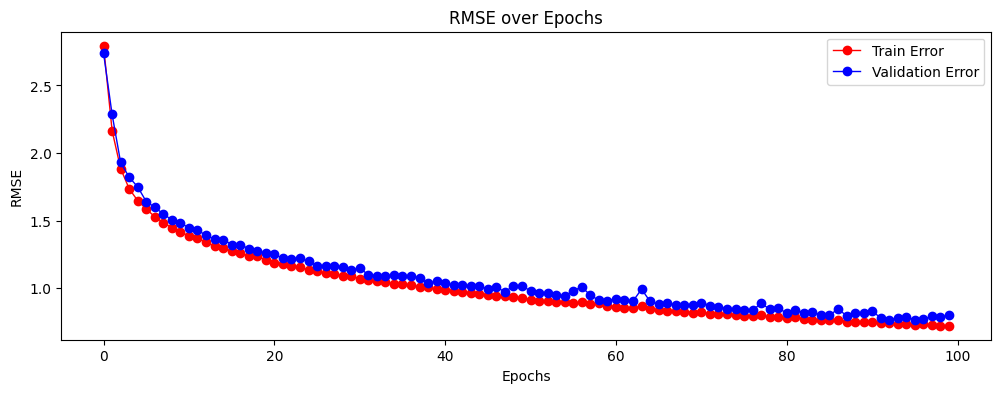

In [65]:
plot_learning_curves(SGDRegressor(loss='squared_error',penalty='l2',eta0=0.0001,learning_rate='constant'), X_train_poly, y_train)

**Lasso Regularization**

**Hypertuning with Learning Rate**

In [66]:
pl_lasso_1=cross_val(SGDRegressor(loss='squared_error',penalty='l1',alpha=0.0001,eta0=0.001), X_train_poly, y_train)
print("---------------------------------")
pl_lasso_2=cross_val(SGDRegressor(loss='squared_error',penalty='l1',learning_rate='constant',alpha=0.01), X_train_poly, y_train)
print("---------------------------------")
pl_lasso_3=cross_val(SGDRegressor(loss='squared_error',penalty='l1',learning_rate='adaptive',alpha=0.001,eta0=0.0001), X_train_poly, y_train)


Cross validation Scores: [0.85845867 0.8925812  0.83450266]
SGDRegressor(eta0=0.001, penalty='l1') | average RMSE:0.8618475088872325 | Standard deviation:0.02383124318670064
---------------------------------
Cross validation Scores: [4.61152845e+12 5.73921348e+12 6.47198470e+12]
SGDRegressor(alpha=0.01, learning_rate='constant', penalty='l1') | average RMSE:5607575544288.052 | Standard deviation:765210545411.6045
---------------------------------
Cross validation Scores: [0.75177584 0.7078059  0.70517705]
SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive', penalty='l1') | average RMSE:0.7215862639204179 | Standard deviation:0.021374215433865872


The hyperparameters significantly impact the Root Mean Squared Error (RMSE) as follows:

1. **SGDRegressor(eta0=0.001, penalty='l1')** | average RMSE:0.8618475088872325 | Standard deviation:0.02383124318670064:Using a small learning rate with L1 regularization results in a low average RMSE and a minimal standard deviation, indicating that the model performs consistently well.
2. **SGDRegressor(alpha=0.01, learning_rate='constant', penalty='l1')** | average RMSE:5607575544288.052 | Standard deviation:765210545411.6045:Setting a higher alpha value with a constant learning rate leads to an extremely high average RMSE and a large standard deviation, suggesting poor model performance and instability.

3. **SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive', penalty='l1')** | average RMSE:0.7215862639204179 | Standard deviation:0.021374215433865872:Utilizing a lower alpha with an adaptive learning rate yields a significantly lower average RMSE and a small standard deviation, indicating a stable and effective model performance.

Based on the RMSE values and their respective standard deviations, the model with the hyperparameters "**SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive', penalty='l1')**" is the best choice.

**Hypertuning with Batch Size**

In [67]:
g=find_batch_size(SGDRegressor(loss='squared_error',penalty='l1',learning_rate='adaptive',alpha=0.001,eta0=0.0001), X_train_poly, y_train)

RMSE : 0.6467905967868165 is minimum with a batch size of 1200 after 15 epochs


,batch_size,epoch,rmse,model_object
0,100,1,2.769499,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
1,100,2,2.225039,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
2,100,3,1.943849,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
3,100,4,1.818521,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
4,100,5,1.737993,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
...,...,...,...,...
175,1200,11,0.655683,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
176,1200,12,0.651848,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
177,1200,13,0.655809,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."
178,1200,14,0.655179,"SGDRegressor(alpha=0.001, eta0=0.0001, learnin..."


**Therfore this model best fits with batch size: 1200 at the epoch:15**

In [68]:
best_model_pl_lasso=g[2]

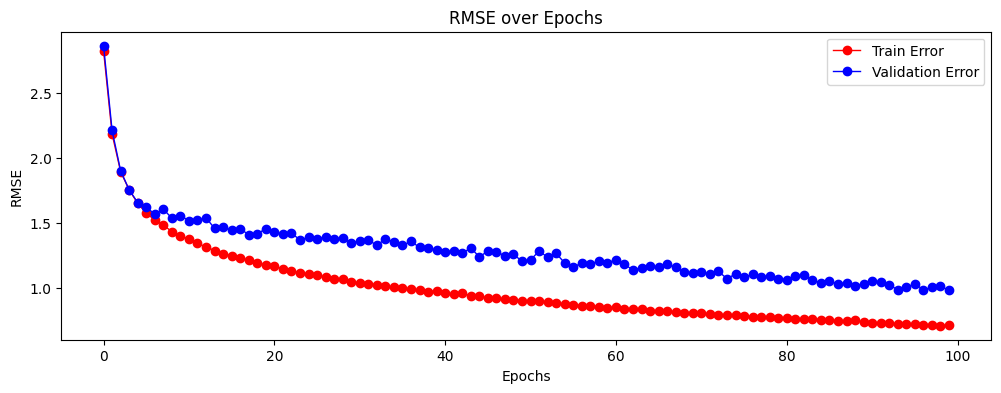

In [69]:
plot_learning_curves(SGDRegressor(loss='squared_error',penalty='l1',learning_rate='adaptive',alpha=0.001,eta0=0.0001), X_train_poly, y_train)

**Elastic Regularization**

**Hypertuning with Learning rate**

In [70]:
pl_elastic_1=cross_val(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=0.1, l1_ratio=0.5,eta0=0.001), X_train_poly, y_train)
print("---------------------------------")
pl_elastic_2=cross_val(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=0.01, l1_ratio=0.2,eta0=0.0001), X_train_poly, y_train)
print("---------------------------------")
pl_elastic_3=cross_val(SGDRegressor(loss='squared_error',penalty='elasticnet',alpha=0.001, l1_ratio=0.7), X_train_poly, y_train)

Cross validation Scores: [0.63881969 0.67901031 0.63566239]
SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet') | average RMSE:0.6511641295920794 | Standard deviation:0.019732370349206566
---------------------------------
Cross validation Scores: [1.32479207 1.50142139 1.35912132]
SGDRegressor(alpha=0.01, eta0=0.0001, l1_ratio=0.2, penalty='elasticnet') | average RMSE:1.3951115950775463 | Standard deviation:0.07646765889994078
---------------------------------
Cross validation Scores: [6.53274739e+11 2.39182082e+11 2.89396375e+11]
SGDRegressor(alpha=0.001, l1_ratio=0.7, penalty='elasticnet') | average RMSE:393951065499.52655 | Standard deviation:184511868867.3955


The hyperparameters significantly impact the Root Mean Squared Error (RMSE) as follows:

1. SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet') | average RMSE:0.6511641295920794 | Standard deviation:0.019732370349206566:This configuration shows a low average RMSE with a small standard deviation, indicating effective performance and consistency in the model's predictions.

2. SGDRegressor(alpha=0.01, eta0=0.0001, l1_ratio=0.2, penalty='elasticnet') | average RMSE:1.3951115950775463 | Standard deviation:0.07646765889994078:While this model performs reasonably well, its average RMSE is notably higher than the previous one, suggesting that it is less effective for the given dataset.

3.SGDRegressor(alpha=0.001, l1_ratio=0.7, penalty='elasticnet') | average RMSE:393951065499.52655 | Standard deviation:184511868867.3955:

This configuration results in an extremely high average RMSE and a substantial standard deviation, indicating poor model performance and high variability in predictions.
Based on the RMSE values, the model with the hyperparameters "**SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet')**" is the best option.

**Hypertuning with Batch Size**

In [71]:
h=find_batch_size(SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet'), X_train_poly, y_train)

RMSE : 0.7027268335675716 is minimum with a batch size of 1200 after 15 epochs


,batch_size,epoch,rmse,model_object
0,100,1,2.187415,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
1,100,2,1.884868,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
2,100,3,1.773841,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
3,100,4,1.686325,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
4,100,5,1.645516,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
...,...,...,...,...
175,1200,11,0.712885,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
176,1200,12,0.709615,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
177,1200,13,0.709460,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."
178,1200,14,0.706092,"SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0..."


**Therfore this model best fits with batch size: 1200 at the epoch:15**

In [72]:
best_model_pl_elastic=h[2]

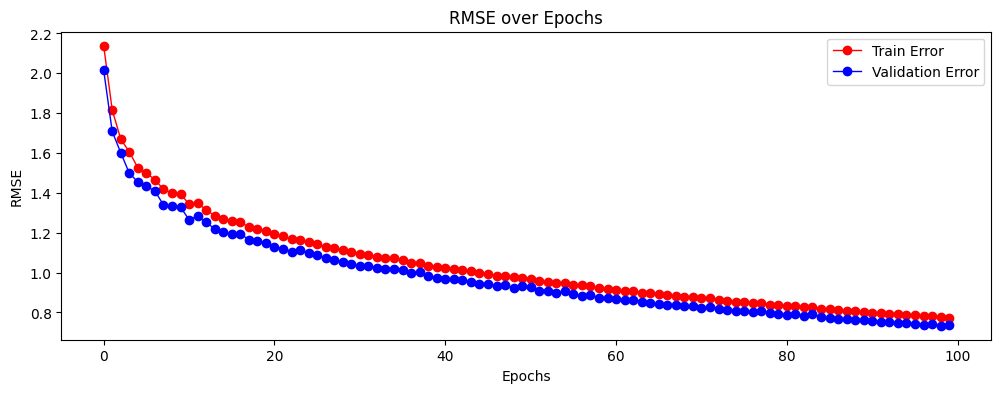

In [73]:
plot_learning_curves(SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet'), X_train_poly, y_train)

**[G]Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.**

**Predictions and Performance Measure for Linear Regression**

In [97]:
best_model_sgd.predict(X_test_trans)
rmse(best_model_sgd, X_test_trans, y_test)

The RMSE of SGDRegressor(eta0=0.001, learning_rate='adaptive') is 0.503614842723342


In [98]:
best_model_ridge.predict(X_test_trans)
rmse(best_model_ridge, X_test_trans, y_test)

The RMSE of SGDRegressor(eta0=0.001) is 0.4775542403336319


In [99]:
best_model_lasso.predict(X_test_trans)
rmse(best_model_lasso, X_test_trans, y_test)

The RMSE of SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive', penalty='l1') is 0.4761909487024128


In [100]:
best_model_elastic.predict(X_test_trans)
rmse(best_model_elastic, X_test_trans, y_test)

The RMSE of SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet') is 0.49419654219370457


**Predictions and Performance Measure for Polynomial Regression**

In [101]:
best_model_pl_sgd.predict(X_test_poly)
rmse(best_model_pl_sgd, X_test_poly, y_test)

The RMSE of SGDRegressor(eta0=1e-05, learning_rate='optimal', loss='huber') is 2.674342078620914


In [102]:
best_model_pl_ridge.predict(X_test_poly)
rmse(best_model_pl_ridge, X_test_poly, y_test)

The RMSE of SGDRegressor(eta0=0.0001, learning_rate='constant') is 0.7252961893205416


In [103]:
best_model_pl_lasso.predict(X_test_poly)
rmse(best_model_pl_lasso, X_test_poly, y_test)

The RMSE of SGDRegressor(alpha=0.001, eta0=0.0001, learning_rate='adaptive', penalty='l1') is 0.6701855043225664


In [104]:
best_model_pl_elastic.predict(X_test_poly)
rmse(best_model_pl_elastic, X_test_poly, y_test)

The RMSE of SGDRegressor(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet') is 0.6510105633828797


**Increasing the batch size typically leads to quicker convergence to the minimum Root Mean Square Error (RMSE) during training. Notably, various gradient descent algorithms, including different forms of stochastic gradient descent (SGD), can reach the same global minimum RMSE with proper tuning. We used RMSE as the main metric to evaluate the performance of each model. Here are the RMSE results for the various models.:**

**Linear Regression**

 SGD Regression(eta0=0.001, learning_rate='adaptive') is 0.503614842723342

 Ridge Regression(eta0=0.001) is 0.4775542403336319

 Lasso Regression(alpha=0.001, eta0=0.0001, learning_rate='adaptive', penalty='l1') is 0.4761909487024128

 Elastic Regression(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet') is 0.49419654219370457


 **Polynomial Regression**

 SGD Regression(eta0=1e-05, learning_rate='optimal', loss='huber') is 2.674342078620914

 Ridge Regression(eta0=0.0001, learning_rate='constant') is 0.7252961893205416

 Lasso Regression(alpha=0.001, eta0=0.0001, learning_rate='adaptive', penalty='l1') is 0.6701855043225664

 Elastic Regression(alpha=0.1, eta0=0.001, l1_ratio=0.5, penalty='elasticnet') is 0.6510105633828797

 **Based on the RMSE values, the models demonstrate varying performance. The Closed form solution for Lasso Regression shows the lowest RMSE, suggesting that it provides the most accurate predictions for the given dataset. For Polynomial Regression, the Closed form solution again outperforms other techniques, despite higher RMSE values in SGD and Ridge Regression. To enhance model performance further, potential strategies include feature engineering, hyperparameter tuning via Grid or Random Search techniques, and investigating additional regularization methods to reduce overfitting. These approaches will optimize model effectiveness and ensure suitability for real-world applications.**


### **Reference**

Source: https://github.com/yanshengjia/ml-road/blob/master/resources/Hands%20On%20Machine%20Learning%20with%20Scikit%20Learn%20and%20TensorFlow.pdf

ChatGPT: https://chatgpt.com/